<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0319_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 3주차 과제
- 타이타닉 데이터를 이용해 IQR값을 계산하고, 이상치 제거 전과 후에 대한 통계치를 비교 분석해주세요.
- 주의! IQR을 사용하려면 수치형 데이터여야 합니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: ylabel='fare'>

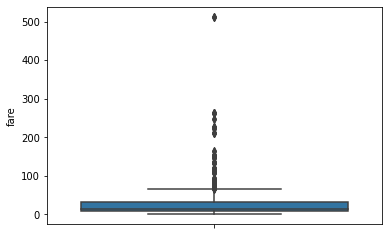

In [ ]:
sns.boxplot(data=df, y='fare')

In [ ]:
p25 = df['fare'].quantile(0.25)
p25

7.9104

In [ ]:
p75 = df['fare'].quantile(0.75)
p75

31.0

In [ ]:
IQR = p75-p25
IQR

23.0896

In [ ]:
p25-1.5*IQR

-26.724

In [ ]:
p75+1.5*IQR

65.6344

In [ ]:
np.where((df['fare']<-26.724) | (df['fare']>65.6344))

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)

In [ ]:
df['fare'] = np.where((df['fare']<-26.724) | (df['fare']>65.6344), np.nan,df['fare'])  # 이상치 na 처리
df.isna().sum()  # 이상치가 na 처리 되었나 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare           116
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df_1 = df.dropna()
df_1.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: ylabel='fare'>

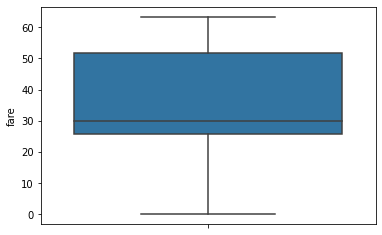

In [ ]:
sns.boxplot(data=df_1, y= 'fare')

In [ ]:
df.fare.mean()  # 이상치 제거 전 평균

32.204207968574636

In [ ]:
df_1.fare.mean()  # 이상치 제거 후 평균

32.780887628865976

=> fare에 대한 이상치를 제거했을 때, 평균에 약 0.6정도의 차이가 존재.

하지만, titanic 데이터의 fare의 경우 객실 등급에 따라 요금 차이가 천차만별이었을 것을 고려했을 때, 이상치를 실제로 비정상적인 값이라고 판단하고 제거하기엔 무리가 있다고 생각됨.